In [29]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib notebook

resonance=1.0/4.0
dvx=0.0030
dvy=0.0030
#resonance=1.0/4.0
#dvx=0.0001
#dvy=0.0001

#resonance=1.0/5.0
#dvx=0.0001
#dvy=-0.0001


pxs=np.concatenate([0.0001*np.arange(20), np.array([],dtype=np.float64)])
pxps=np.zeros_like(pxs)
particles=np.vstack([pxs,pxps])
#xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvx, chrom=0.0, espr=0.0, particles=particles)

betax = 1.0
alfax = 0.0
betay = 1.0
alfay = 0.0

xpx=map2D(npart=5000, emit=1e-6, twiss=[betax,alfax],twiss_beam=[betax,alfax],tune=0.1025, chrom=0.0, espr=0.0)
ypy=map2D(npart=5000, emit=1e-6, twiss=[betay,alfay],twiss_beam=[betay,alfay],tune=0.1975, chrom=0.0, espr=0.0)

pys=0.000*np.zeros_like(pxs)
pyps=np.zeros_like(pys)
particles=np.vstack([pys,pyps])
#ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvy, chrom=0.0, espr=0.0,particles=particles, 
#          emit=0.1e-6)

avex,avep,sizex,sizep,emit=xpx.statistics()
emitlistx=[]
sizelistx=[]
avelistx=[]

emitlisty=[]
sizelisty=[]
avelisty=[]

B2Slist = []

N_turn=200



def evolve_func(turns, kick_turn_start=0, B2=00.0,B2S0=30,
               ):
    for i in range(turns):
        B2S = B2S0*np.sin(2 * np.pi *i/turns)
        if i>=kick_turn_start:
            xpx.coor2D[1,:]-=B2 *(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0 - B2S*ypy.coor2D[0,:]*xpx.coor2D[0,:]
            ypy.coor2D[1,:]+=B2S*(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0 + B2 *ypy.coor2D[0,:]*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        avex,avepx,sizex,sizepx,emitx=xpx.statistics()
        avey,avepy,sizey,sizepx,emity=ypy.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        emitlistx.append(1e6*emitx)
        emitlisty.append(1e6*emity)
        B2Slist.append(B2S)
        yield xpx.coor2D
        #yield ypy.coor2D
        
evolve=evolve_func(N_turn+2)
    
# fig,ax=plt.subplots()
# ax.set_xlim([-0.005,0.005])
# ax.set_ylim([-0.005,0.005])
# xlist=[]
# xplist=[]



for i in range(N_turn):
    arr=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arr[0])
    xplist.append(arr[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
# ax.plot(xarr,xparr,linestyle='None', marker='.', markersize=2)
#ax.set_xticks([])
#ax.set_yticks([])
Jx=xarr*xarr+xparr*xparr
#fig.savefig("test.png",dpi=300,transparent=True)

<IPython.core.display.Javascript object>


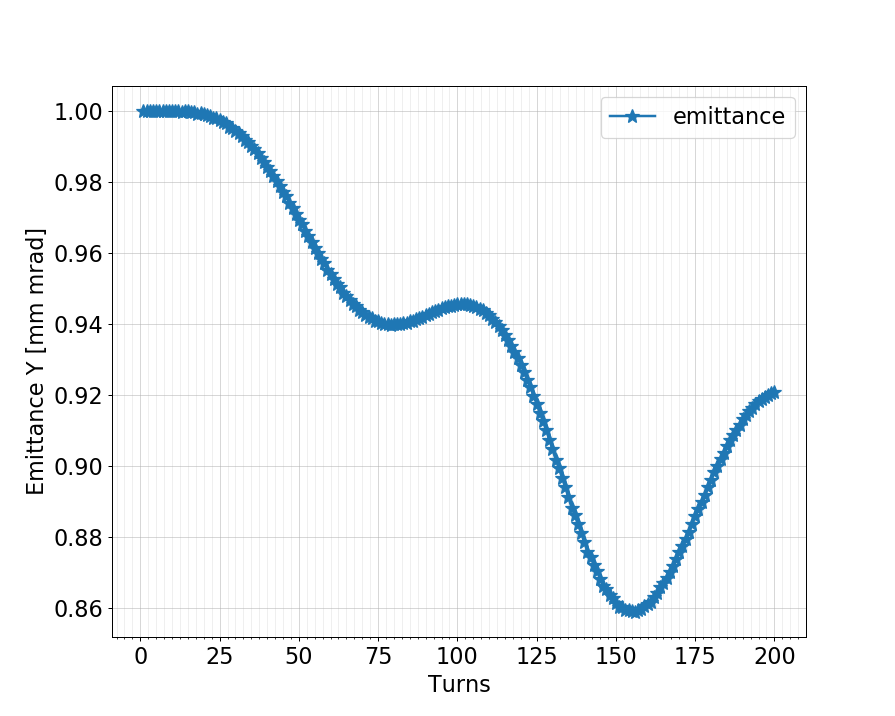

In [30]:
Turns_Arra=np.linspace(1, N_turn, num=N_turn)


fig = plt.figure(1, figsize=(10, 8))
fig.set_facecolor('w')

sp0 = fig.add_subplot(1,1, 1)

sp0.plot(Turns_Arra,emitlisty,label="emittance",marker='*',linewidth=2, markersize=12)

#sp1.plot(SEY,Qaudrupole_SEYN,label="Qaudrupole_SEY_Negative")

sp0.set_ylabel('Emittance Y [mm mrad]',fontsize=18)
sp0.set_xlabel('Turns',fontsize=18)
#sp1.grid(which='minor')
sp0.grid(which='both')                                                                                           
#ax.grid(which='minor', alpha=0.3)                                                
#ax.grid(which='major', alpha=0.4) 
#sp1.set_xlim([1.06,1.51])
#sp1.set_xticks([1.06,1.11, 1.16,1.21,1.26,1.31,1.36,1.41,1.46,1.51])
sp0.tick_params(axis='both', which='major', labelsize=18)
sp0.legend(fontsize=18)
# sp0.set_yscale('log')
sp0.legend()
sp0.legend(loc='lower right')
sp0.legend(fontsize = 18)

from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(10)
sp0.xaxis.set_minor_locator(minor_locator)
sp0.grid(which='minor', alpha=0.2)
sp0.grid(which='major', alpha=1.5)

<IPython.core.display.Javascript object>


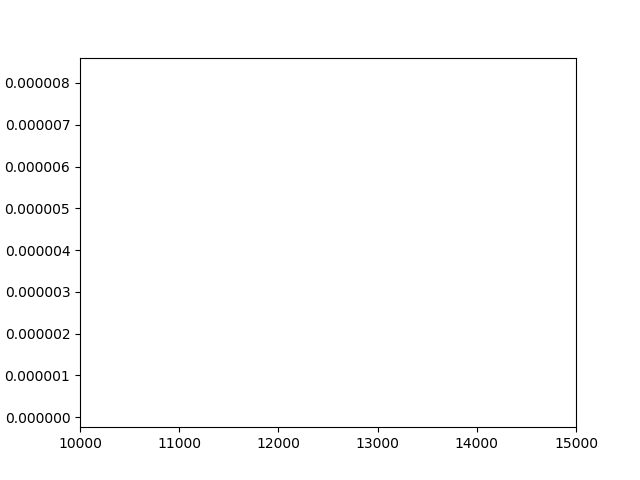

In [94]:
fig,ax=plt.subplots()
ax.set_xlim([10000,15000])
for i in range(8):
    ax.plot(Jx[:,i+1])
